# Accelerate your AI journey with Pre-Trained Models 


### Setup

To run this notebook, you will need the following:
- Python 3.5/3.6 (via Anaconda)
- Tensorflow > 1.2
- Keras

Image processing tasks will be much faster with a GPU and GPU enabled tensorflow.

To install tensorflow_gpu, follow the instructions at: [tf_GPU link](link.com)

If you do not have access to a local GPU, you can get access to a GPU enabled VM through [AWS](aws.com), [Azure](portal.azure.com), or services such as [Paperspace](paperspace.com). 

[Google CoLab](google.com) will also give you access to a K80 accelerator.


### Data

dogscats is available from fastai [download](http://files.fast.ai/data/)


## Neural Networks in 5(ish) minutes

For more detailed explanations, I recomend Brandon Roeher's materials on [artificial neural networks](Link.com) and [convolutional neural networks](link.com).


#### Weights, Activations, Backpropigation

For starters: matrix multiplication, dot products, and activation functions. 

In a _linear regression_ with two inputs (x_1, x_2), we could represent a model as y = w_1*x_1 + w_2*x_2
In a _logistic regression_, we would take our same inputs, multiply each of them by a weight, and transform them with a logit function - y = 1/(1+e^-(w_1*x_1 + w_2*x_2))


![Ann](./images/ann.png)

In a neural network, we perform a similar action - at every node. We take an input vector x (x_1...x_n), take the dot product of our input vector and a weight vector, and then transform the output with a function. A simple network with 3 inputs (X1,X2,X3), and 2 neurons (called perceptrons) using a sigmoid activation would have 6 weights (2 sets of 3 weights), and calculate 2 sigmoid functions.

![Ann2](./images/ann2.gif)

While sigmoid activations are the traditional example (tanh, softplus, etc), linear activations such as Rectified Linear Units (ReLu) have become popular due to their advantages in training.

This is the forward pass - in order to optimize and train the network, we propagate the error (difference between our calculated value and the intended "true" value) backwards through the network. **Very** loosely - if we think of each layer as being dependent on previous layers, we can adjust the weights at each layer with respect to weights further in the network by taking the partial dervative of the activation at each layer and adjusting the weight with respect to the gradient (_descending the gradient_).

[Andrew Ng on backprop](https://www.youtube.com/watch?v=mOmkv5SI9hU)

#### Convolutional Neural Networks

For computer vision and image based tasks, we are often dealing with CNNs, or convolutional networks. In a CNN, there are two important layers: convolutional layers (passing kernels over an image) and pooling layers (summarizing layers, usually taking the maximum, to down sample)

Convolution:
![CNN](./images/conv.png)

Convolution Process:
![CNN](./images/conv.gif)

Pooling:
![Pool](./images/pool.png)

In practice, we use banks of filters - at each block of convolutional layers, there may be 100's of 3x3 filters. In a traditional MLP network, we are training the weights. In a convolutional network, we are training the kernels.

[Stanford Lecture on CNN](https://www.youtube.com/watch?v=AQirPKrAyDg)

[Stanford Slides on CNN Architectures](http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture9.pdf)

### Architecture - VGG

[Original Paper - Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)

![VGG Arch](./images/vgg16_2.png)

![VGG Table](./images/vgg16_table.png)

In [1]:
from keras.applications import ResNet50, VGG16
from keras.models import Model, Sequential

Using TensorFlow backend.


In [2]:
m = VGG16(weights='imagenet', include_top=True)
m.compile(optimizer='rmsprop', 
                  loss='binary_crossentropy', metrics=['accuracy'])

In [3]:
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

### Architecture - VGG

[Original Paper - Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385v1.pdf)

![Residual Learning Block](./images/ResNet.png)


![ResNetScroll](./images/ResNet.gif)

In [4]:
m = ResNet50(weights='imagenet', include_top=True)
m.compile(optimizer='rmsprop', 
                  loss='binary_crossentropy', metrics=['accuracy'])

102858752/102853048 [==============================] - 14s 0us/step


In [5]:
m.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin


# Training

VGG and ResNet were both designed for the [ImageNet](http://www.image-net.org/) image classification dataset - with the goal of achieving the best possible top-5 likelihood score for 1000 possible classes for a given image. The networks were trained for days on GPUs to achieve their optimal weights, and one can imagine that the over-all training time during development can be accurately measured in weeks.

### **Our problem: We don't have days and weeks to spend training networks (assuming our architecture works)**

What we can do, is jump-start our process by using the layers and pre-trained weights from proven architectures like VGG or ResNet, and either adding new layers which we train on our new training data, or selectively training layers in the existing architectures to adjust them to our specific needs. In this fasion, we can cut the training time needed to produce a production ready architecture down from days to minutes or hours.

# Lets give it a run: Dogs and Cats

In this example, we'll use VGG16 with weights pre-trained on the imagenet dataset to jump-start our training process. We can selectively un-freeze layers to adjust how much we're customizing the network to our needs, or add new layers that we'll train to our specific problem - identifying cats and dogs.



In [6]:
from IPython.display import display
from PIL import Image
import os

### Look at our images:

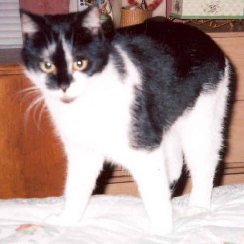

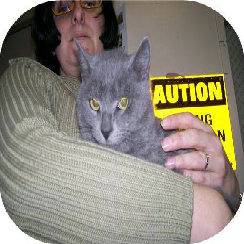

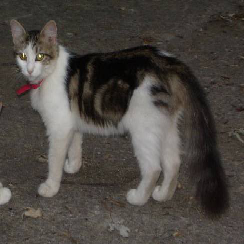

In [7]:
for cat in os.listdir('../data/dogscats/train/cats/')[:3]:
    path = '../data/dogscats/train/cats/' + cat
    im = Image.open(path).resize((244,244))
    display(im)

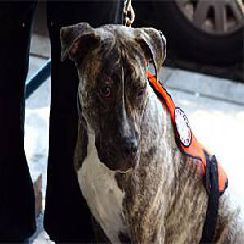

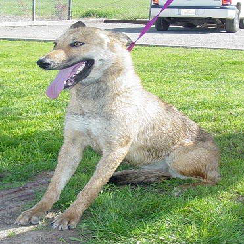

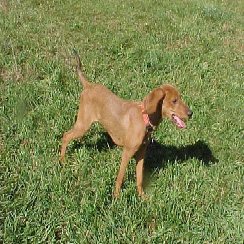

In [8]:
for dog in os.listdir('../data/dogscats/train/dogs/')[:3]:
    path = '../data/dogscats/train/dogs/' + dog
    im = Image.open(path).resize((244,244))
    display(im)

### Import Keras 

"Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research."

[Keras Website & Documentation](https://keras.io/)

In [9]:
#numpy
import numpy as np

#OpenCV
import cv2

#Keras Processing
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

#Keras Models & Layers
from keras.models import Model, Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

#Keras - Pretrained Models
from keras.applications import resnet50,vgg16,VGG16,ResNet50



In [10]:
train_path = '../data/dogscats/train/'
validation_path = '../data/dogscats/valid/'
test_path= '../data/dogscats/sample/valid'

In [11]:
#image size
sz = 244

#batch size
bz = 64

In [12]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
    shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

print('Train:')
train_generator = train_datagen.flow_from_directory(train_path,
                                                    shuffle=True,
    target_size=(sz, sz),
    batch_size=bz, class_mode='binary')

print('Validation:')
validation_generator = test_datagen.flow_from_directory(validation_path,
    shuffle=False,
    target_size=(sz, sz),
    batch_size=bz, class_mode='binary')

print('Test Sample:')
test_generator = test_datagen.flow_from_directory(test_path,
    shuffle=False,
    target_size=(sz, sz),
    batch_size=1, class_mode='binary')

Train:
Found 23000 images belonging to 2 classes.
Validation:
Found 2000 images belonging to 2 classes.
Test Sample:
Found 8 images belonging to 2 classes.


# Model1 - VGG16

![VGG](./images/vgg16.png)

In [13]:
#Base Model - VGG
base_model_vgg = VGG16(weights='imagenet', include_top=False)

#Add new layers
vgg_new = base_model_vgg.output
vgg_new = GlobalAveragePooling2D()(vgg_new)
vgg_new = Dense(512, activation='relu')(vgg_new)

#Make Predictions
predictions_vgg = Dense(1, activation='softmax')(vgg_new)

In [14]:
model_vgg = Model(inputs=base_model_vgg.input, outputs=predictions_vgg)

In [15]:
for layer in base_model_vgg.layers: 
    layer.trainable = False

In [16]:
model_vgg.compile(optimizer='rmsprop', 
                  loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model_vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [19]:
model_vgg.fit_generator(train_generator, train_generator.n // bz, epochs=1, workers=3,
        validation_data=validation_generator, validation_steps=validation_generator.n // bz)

Epoch 1/1
359/359 [==============================] - 186s 517ms/step - loss: 7.9772 - acc: 0.4996 - val_loss: 8.0355 - val_acc: 0.4960


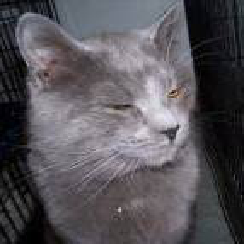

1.0


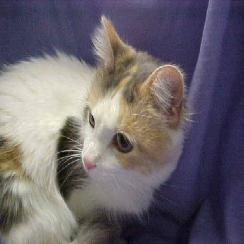

1.0


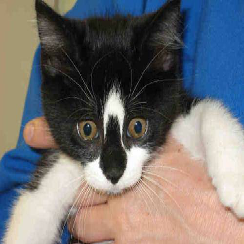

1.0


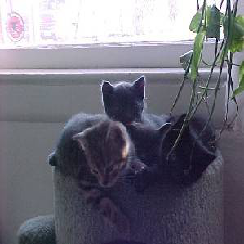

1.0


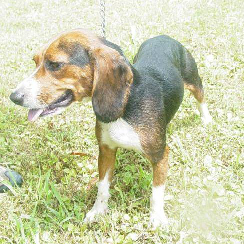

1.0


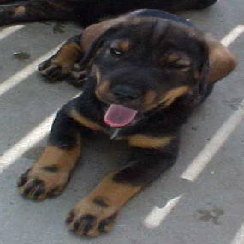

1.0


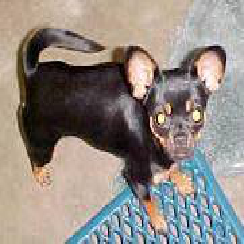

1.0


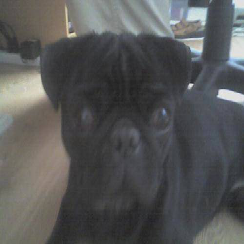

1.0


In [20]:
n_preds = 8
preds = model_vgg.predict_generator(test_generator,n_preds)

for i in range(0,n_preds):
    display(Image.open(test_path+'/'+test_generator.filenames[i]).resize((244,244)))
    print(float("{:.4f}".format(float(preds[i]))))

### Re-train some conv. layers

In [ ]:
for layer in model_vgg.layers[:15]: layer.trainable = False
for layer in model_vgg.layers[15:]: layer.trainable = True
model_vgg.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_vgg.summary()

In [ ]:
model_vgg.fit_generator(train_generator, train_generator.n // bz, epochs=3, workers=3,
        validation_data=validation_generator, validation_steps=validation_generator.n // bz)

In [ ]:
n_preds = 8
preds = model_vgg.predict_generator(test_generator,n_preds)

for i in range(0,n_preds):
    display(Image.open(test_path+'/'+test_generator.filenames[i]).resize((244,244)))
    print(float("{:.4f}".format(float(preds[i]))))

# Model2 - ResNet50

In [21]:
from keras.applications.resnet50 import preprocess_input

In [22]:
base_model = ResNet50(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [23]:
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers: layer.trainable = False
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit_generator(train_generator, train_generator.n // bz, epochs=3, workers=4,
        validation_data=validation_generator, validation_steps=validation_generator.n // bz)

Epoch 1/3
359/359 [==============================] - 147s 410ms/step - loss: 0.2188 - acc: 0.9507 - val_loss: 0.0760 - val_acc: 0.9723
Epoch 2/3
359/359 [==============================] - 145s 404ms/step - loss: 0.0867 - acc: 0.9714 - val_loss: 0.0373 - val_acc: 0.9839
Epoch 3/3
 23/359 [>.............................] - ETA: 1:59 - loss: 0.0561 - acc: 0.9803

In [ ]:
n_preds = 8
preds = model.predict_generator(test_generator,n_preds)

for i in range(0,n_preds):
    display(Image.open(test_path+'/'+test_generator.filenames[i]).resize((244,244)))
    print(float("{:.4f}".format(float(preds[i]))))

### Retrain Layers

In [ ]:
split_at = 140
for layer in model.layers[:split_at]: layer.trainable = False
for layer in model.layers[split_at:]: layer.trainable = True
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:

model.fit_generator(train_generator, train_generator.n // batch_size, epochs=1, workers=3,
        validation_data=validation_generator, validation_steps=validation_generator.n // batch_size)

In [ ]:
n_preds = 8
preds = model.predict_generator(test_generator,n_preds)

for i in range(0,n_preds):
    display(Image.open(test_path+'/'+test_generator.filenames[i]).resize((244,244)))
    print(float("{:.4f}".format(float(preds[i]))))